In [4]:
import plotly.express as px
import os
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy.random
from scipy import stats


%load_ext autoreload
%autoreload 2

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import load_json
from collections import defaultdict
from data_selection.data_selection_utils import float_floor

from consistency import (
    dnli_human_bucket_predictions,
    dnli_test_set_predictions,
    anli_human_bucket_predictions,
    anli_test_set_predictions,
    construct_bucket_metadata,
    get_original_example_prediction_accuracy,
    calculate_weighted_consistency,
    get_consistencies
)
sns.set_style("darkgrid")


In [ ]:
ground_truth = buckets.gold_label.to_numpy()
confidences = buckets.original_confidence_in_prediction.to_numpy()

from netcal.presentation import ReliabilityDiagram

n_bins = 100

diagram = ReliabilityDiagram(n_bins)
diagram.plot(confidences, ground_truth)  # visualize miscalibration of uncalibrated confidences

from netcal.metrics import ECE

n_bins = 100

ece = ECE(n_bins)
uncalibrated_score = ece.measure(confidences, ground_truth)

uncalibrated_score

In [7]:
def plot_conf_routine(model_name):
    buckets = construct_bucket_metadata(
        dnli_human_bucket_predictions['snli'][model_name], model_name=model_name
    )

    #### plot variances ####
    buckets['original_confidence_in_prediction'] = buckets.original_confidence.map(np.max)
    sns.scatterplot(x=buckets.original_confidence_in_gold_label, y=buckets.bucket_confidence_var)
   
    #### plot pairwise confs ####
    plt.clf()
    xs = []
    ys = []
    
    for _, row in buckets.iterrows():
        for bconf in row.bucket_confidence_distribution:
            xs.append(row.original_confidence_in_gold_label)
            ys.append(bconf)
    sns.scatterplot(x=xs, y=ys)

    stats.pearsonr(xs, ys)
    #### plot pairwise conf heatmaps ####
    heatmap, xedges, yedges = np.histogram2d(xs, ys, bins=23)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    fig, ax = plt.subplots()
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='seismic')
    
    ax.axline((0, 0), slope=1)
    
    plt.show()

    #### plot bucket ####
    fig, ax = plt.subplots()
    ax.axline((0, 0), slope=1, color='red', alpha=0.3, linestyle='--')
    sns.scatterplot(x=buckets.original_confidence_in_gold_label, y=buckets.bucket_confidence_mean)

    
    stats.pearsonr(buckets.original_confidence_in_gold_label, buckets.bucket_confidence_mean)


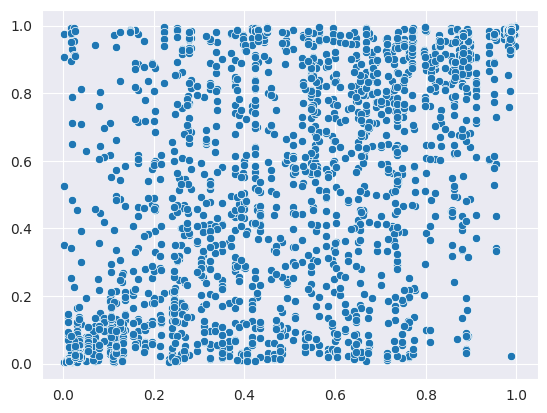

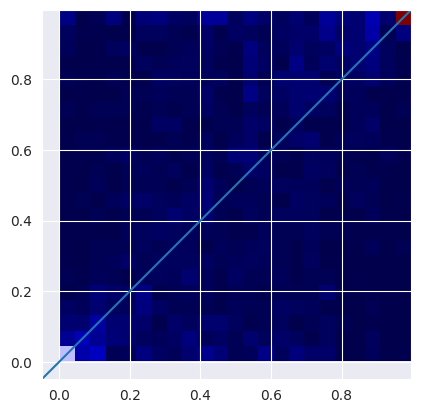

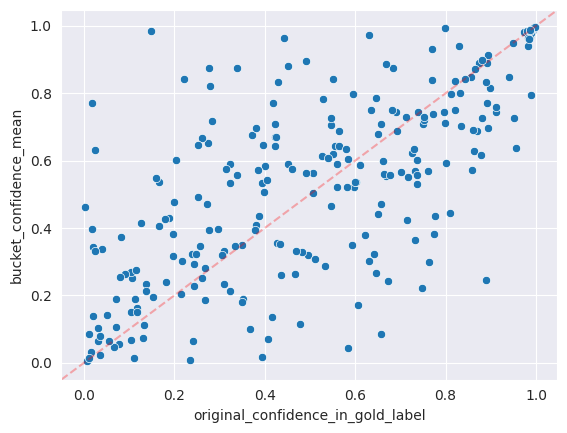

In [8]:
plot_conf_routine('specialized_roberta')

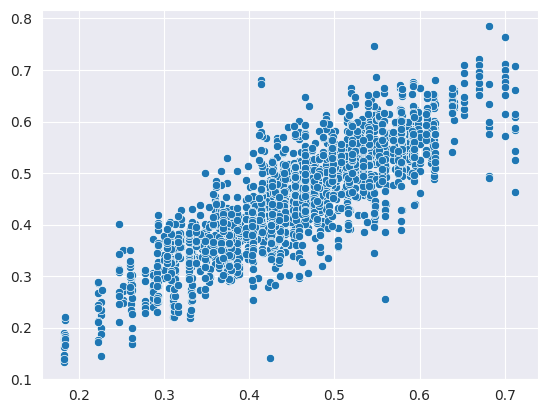

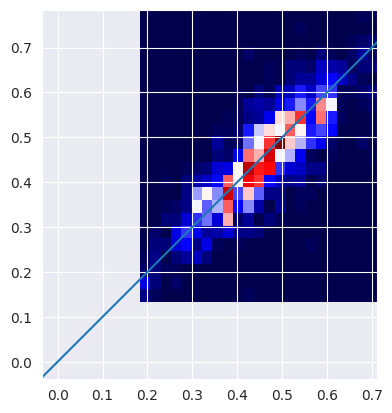

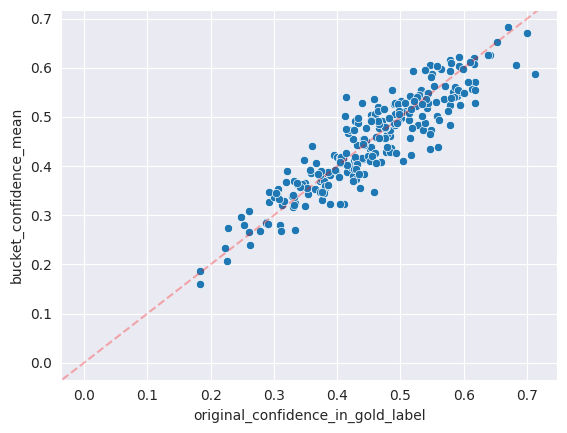

In [9]:
plot_conf_routine('gpt3-curie')